In [ ]:
pip install plotly

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot


# create a function for labeling #
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,'%d' % int(height),ha='center', va='bottom')

In [7]:
# read the input files and look at the top few lines #

match_df = pd.read_csv("D:\sem5\datasets\matches.csv")
deliveries = pd.read_csv("D:\sem5\datasets\deliveries.csv")
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


MAN OF THE MATCH

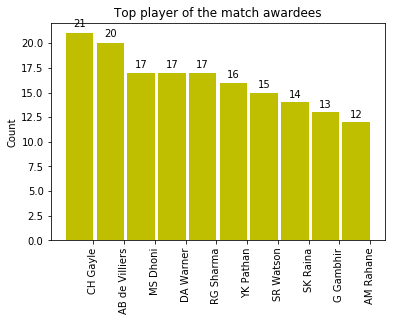

In [8]:
temp_series = match_df.player_of_match.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width, color='y')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top player of the match awardees")
autolabel(rects)
plt.show()

CHECK MOST NUMBER OF RUNS SCORED BY THE BATSMAN

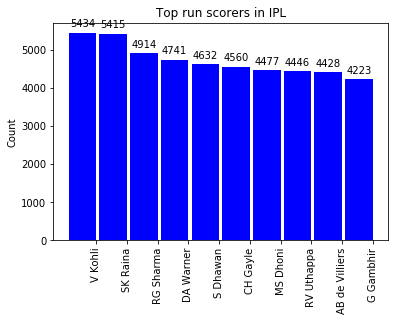

In [13]:
temp_df = deliveries.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
autolabel(rects)
plt.show()

LET'S SEE WHO SCORED THE MOST NUMBER OF BOUNDARIES

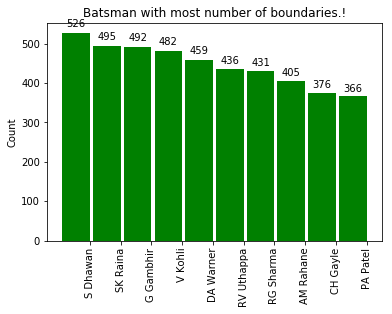

In [16]:
temp_df = deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='green')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of boundaries.!")
autolabel(rects)
plt.show()

 NUMBER OF SIXES BY A PLAYER

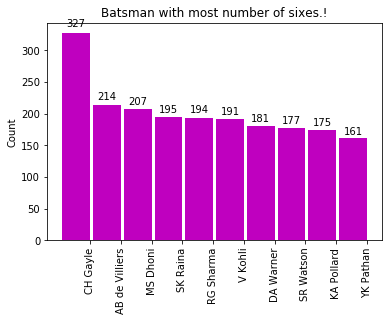

In [18]:
temp_df = deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='m')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of sixes.!")
autolabel(rects)
plt.show()

In [19]:
df_strike_rate = deliveries.groupby(['batsman']).agg({'ball':'count','batsman_runs':'mean'}).sort_values(by='batsman_runs',ascending=False)
df_strike_rate.rename(columns ={'batsman_runs' : 'strike rate'}, inplace=True)
df_runs_per_match = deliveries.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
df_total_runs = df_runs_per_match.groupby(['batsman']).agg({'sum' ,'mean','count'})
df_total_runs.rename(columns ={'sum' : 'batsman run','count' : 'match count','mean' :'average score'}, inplace=True)
df_total_runs.columns = df_total_runs.columns.droplevel()
df_sixes = deliveries[['batsman','batsman_runs']][deliveries.batsman_runs==6].groupby(['batsman']).agg({'batsman_runs':'count'})
df_four = deliveries[['batsman','batsman_runs']][deliveries.batsman_runs==4].groupby(['batsman']).agg({'batsman_runs':'count'})
df_batsman_stat = pd.merge(pd.merge(pd.merge(df_strike_rate,df_total_runs, left_index=True, right_index=True),
                                    df_sixes, left_index=True, right_index=True),df_four, left_index=True, right_index=True)

In [20]:
df_batsman_stat.rename(columns = {'ball' : 'ball', 'strike rate':'strike_rate','batsman run' : 'batsman_run',
                                  'match count' : 'match_count','average score' : 'average_score' ,'batsman_runs_x' :'six',
                                  'batsman_runs_y':'four'},inplace=True)
df_batsman_stat['strike_rate'] = df_batsman_stat['strike_rate']*100
df_batsman_stat.sort_values(by='batsman_run',ascending=False,inplace=True)
#df_batsman_stat.sort_values(by='batsman_run',ascending=False)
df_batsman_stat.reset_index(inplace=True)

AVERAGE SCORE BY BATSMAN

In [26]:
average_score=df_batsman_stat.sort_values(by='average_score',ascending=False)
average_score=average_score[average_score['match_count']>50].head(10)
average_score.head(10)


,batsman,ball,strike_rate,batsman_run,average_score,match_count,six,four
3,DA Warner,3398,139.523249,4741,37.626984,126,181,459
5,CH Gayle,3131,145.640370,4560,36.774194,124,327,376
22,SE Marsh,1913,130.109775,2489,36.072464,69,78,269
31,KL Rahul,1465,137.406143,2013,34.706897,58,81,178
32,MEK Hussey,1648,119.963592,1977,34.086207,58,52,198
37,RR Pant,1104,162.318841,1792,33.185185,54,94,154
0,V Kohli,4211,129.042983,5434,32.153846,169,191,482
8,AB de Villiers,2977,148.740343,4428,31.183099,142,214,357
25,SR Tendulkar,2044,114.187867,2334,29.923077,78,29,296
4,S Dhawan,3776,122.669492,4632,29.316456,158,96,526


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

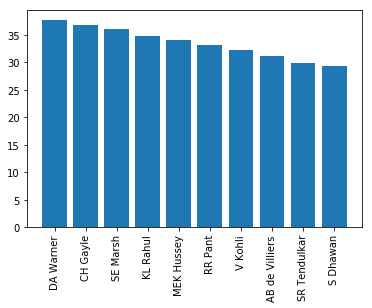

In [37]:
plt.bar(x=average_score['batsman'],height = average_score['average_score'])
plt.xticks(rotation='vertical')

STRIKE RATE OF BATSMAN

In [24]:
strike_rate=df_batsman_stat.sort_values(by='strike_rate',ascending=False)
strike_rate=strike_rate[strike_rate['match_count']>50].head(10)
strike_rate.head(10)

,batsman,ball,strike_rate,batsman_run,average_score,match_count,six,four
48,AD Russell,803,179.950187,1445,27.788462,52,119,98
81,SP Narine,481,166.943867,803,14.870370,54,44,94
37,RR Pant,1104,162.318841,1792,33.185185,54,94,154
51,GJ Maxwell,902,155.543237,1403,20.940299,67,91,110
61,HH Pandya,736,151.902174,1118,18.327869,61,69,73
20,V Sehwag,1833,148.827059,2728,26.230769,104,106,334
8,AB de Villiers,2977,148.740343,4428,31.183099,142,214,357
5,CH Gayle,3131,145.640370,4560,36.774194,124,327,376
18,KA Pollard,1964,141.751527,2784,21.090909,132,175,182
3,DA Warner,3398,139.523249,4741,37.626984,126,181,459


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

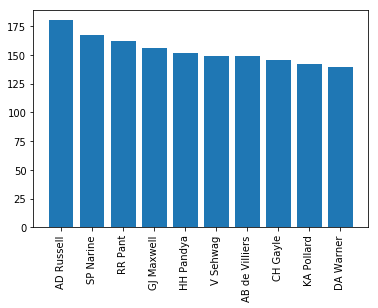

In [38]:
plt.bar(x=strike_rate['batsman'],height = strike_rate['strike_rate'])
plt.xticks(rotation='vertical')

TOP 10 BATSMAN

In [25]:
top_df_batsman=df_batsman_stat.head(20)
top_df_batsman.head(10)

,batsman,ball,strike_rate,batsman_run,average_score,match_count,six,four
0,V Kohli,4211,129.042983,5434,32.153846,169,191,482
1,SK Raina,4044,133.902077,5415,28.650794,189,195,495
2,RG Sharma,3816,128.773585,4914,27.000000,182,194,431
3,DA Warner,3398,139.523249,4741,37.626984,126,181,459
4,S Dhawan,3776,122.669492,4632,29.316456,158,96,526
5,CH Gayle,3131,145.640370,4560,36.774194,124,327,376
6,MS Dhoni,3318,134.930681,4477,26.335294,170,207,297
7,RV Uthappa,3492,127.319588,4446,26.152941,170,156,436
8,AB de Villiers,2977,148.740343,4428,31.183099,142,214,357
9,G Gambhir,3524,119.835414,4223,27.966887,151,59,492
